# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
  
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.ensemble import BaggingClassifier

# Importing Data.

In [2]:
train_ds = pd.read_csv("./Dataset/train.csv")
test_ds = pd.read_csv("./Dataset/test.csv")

In [3]:
print("Train data shape: {}\nTest data shape: {}".format(train_ds.shape, test_ds.shape))

Train data shape: (891, 12)
Test data shape: (418, 11)


In [4]:
y = train_ds.pop('Survived')
data = train_ds.copy()

# Data Preprocessing and Exploration

- SibSp: # of sibling/spouses aboard the Titanic
- Parch: # of parents/childred aboard the Titanic
- embarked: port of embarkataion (Boarding port of passengers)
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton
- Pclass: Socio-economic status
    - 1st = Upper
    - 2nd = middle
    - 3rd = lower
- SibSp: Sibling/Spouse(brother, sister, stepbrother, stepsister / husband, wife)
- parch: parent(mother, fatehr), child(daughter, son, stepdaughter, stepson)
- rest are self explanatory

In [5]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Robins, Mrs. Alexander A (Grace Charity Laury)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


## Dealing with missing value

In [8]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.Age.describe()
# since the mean age and median(or second quartile) are close to each other,
# so the missing values can be replaced by median value

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
data.Cabin.describe()
# The missing value in case of Cabin are very large so we'll convert the value into true and false
# depending upon whether the person has cabin or not.

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [11]:
data.Embarked.describe()
# The missing value in Embarked will be replaced by model of Embarked i.e S

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [12]:
data['Age'].fillna(data.Age.median(), inplace = True)
data['Embarked'].fillna('S', inplace = True)
data['Cabin'] = data['Cabin'].notnull().replace({True:1, False:0})

data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Feature Engineering
### we have the following Numerical Variables:
- PassengerId: We are going to drop it
- Name: Extract the title and drop names
- Age: Convert into categorical column using bins
- Ticket: drop it
- Fare: convert into categorical variable

### New Features
- The first feature that we are going to create is the title of names which will tell us their position in real life.
- The second and third feature will be the age category and fare category

### Name Title

In [13]:
data['name_title'] = data['Name'].apply(lambda x : x.split(".")[0].split(",")[1].strip())
data['name_title'].unique() 

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [14]:
data['name_title'] = data['name_title'].replace('Mlle','Miss')
data['name_title'] = data['name_title'].replace('Mme','Mrs')
s = ( 'Major', 'Lady', 'Sir','the Countess', 'Jonkheer', 'Don', 'Rev', 'Dr','Capt','Col')
data['name_title'] =  data['name_title'].replace(s,'special')

data.name_title.value_counts()

Mr         517
Miss       184
Mrs        126
Master      40
special     23
Ms           1
Name: name_title, dtype: int64

### Age category

In [15]:
len(data.Age.value_counts())

88

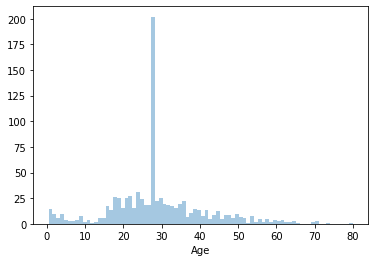

In [16]:
sns.distplot(data.Age, bins =80, kde = False)

### Fare category

In [17]:
data['Age_category'] = pd.qcut(data['Age'], q=4, labels = False)
data.Age_category.value_counts()

1    308
0    231
3    217
2    135
Name: Age_category, dtype: int64

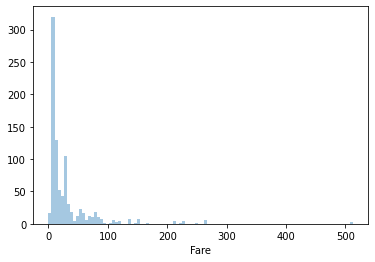

In [18]:
sns.distplot(data.Fare, bins =100, kde = False)

In [19]:
data['Fare_category'] = pd.qcut(data['Fare'], q=4, labels = False)
data.Fare_category.value_counts()

1    224
0    223
3    222
2    222
Name: Fare_category, dtype: int64

# Data visualization

#### Categorical Variable

- Sruvived: THE TARGET
- Pclass
- Sex
- Embarked
- SibSp
- Parch
- Cabin

#### Engineered categorical variables
- name_title
- Age
- Fare

# Some stats
### Gender vs survived

In [20]:
gender_stats = pd.crosstab(index = data.Sex,
                          columns = 'count',
                          normalize = True)
gender_stats
# Out of total passengers 65% were male wheseas only 35% are female

col_0,count
Sex,
female,0.352413
male,0.647587


In [21]:
gender_survivor_stats = pd.crosstab(index = data.Sex,
                                   columns = y,
                                   margins = True,
                                   normalize = 'index')
gender_survivor_stats
# The data below shows that 61% of people onboard Titanic did not survive the crash and only 39% survived
# also 74% of female survives the crash and only 26% died there
# and 81% of male died there wile only 19% survives the crash

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


### Pclass vs survived

In [22]:
pclasses = pd.crosstab(index = data.Pclass,
                      columns = 'count',
                      normalize = True)
pclasses
# Of the total passengers 55% are 3rd class, 21% are 2nd class, 24% are 1st class passengers.

col_0,count
Pclass,
1,0.242424
2,0.206510
3,0.551066


In [23]:
pclass_survivor_stats = pd.crosstab(index = data.Pclass,
                                   columns = y,
                                   normalize = 'index',
                                   margins = True)
pclass_survivor_stats
# we already know the last line of the data shown below
# among 1st class passengers 63% survives the crash and only 37% died
# for 2nd class passengers the survival is 50-50
# and for 3rd class passengers about 76% died while only 24% survives the crash

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


### Embarcation vs survived

In [24]:
embarkations = pd.crosstab(index = data.Embarked,
                      columns = 'count',
                      normalize = True)
embarkations
# most of the passengers (73.5%) are from Southampton and least number of passengers(8.6%) are from Queenstown
# Cherbourg falls in between them(18.8%).

col_0,count
Embarked,
C,0.188552
Q,0.086420
S,0.725028


In [25]:
embarkation_survivor_stats = pd.crosstab(index = data.Embarked,
                                   columns = y,
                                   normalize = 'index',
                                   margins = True)
embarkation_survivor_stats

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009
All,0.616162,0.383838


### sibsp vs survived

In [26]:
SibSps = pd.crosstab(index = data.SibSp,
                      columns = 'count',
                      )
SibSps
# There are more number of passengers with 0 or 1 sibling/spouse with them

col_0,count
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


In [27]:
sibsp_survivor_stats = pd.crosstab(index = data.SibSp,
                                   columns = y,
                                   normalize = 'index',)
sibsp_survivor_stats

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


### parch vs survived

In [28]:
parches = pd.crosstab(index = data.Parch,
                      columns = 'count',
                      normalize = True)
parches
# most of passengers are with 0 or 1 or 2 parents

col_0,count
Parch,
0,0.760943
1,0.132435
2,0.089787
3,0.005612
4,0.004489
5,0.005612
6,0.001122


In [29]:
parch_survivor_stats = pd.crosstab(index = data.Parch,
                                   columns = y,
                                   normalize = 'index',
                                   margins = True)
parch_survivor_stats

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000
All,0.616162,0.383838


### cabin vs survived

In [30]:
cabins = pd.crosstab(index = data.Cabin,
                      columns = 'count',
                      normalize = True)
cabins

col_0,count
Cabin,
0,0.771044
1,0.228956


In [31]:
cabin_survivor_stats = pd.crosstab(index = data.Cabin,
                                   columns = y,
                                   normalize = 'index',)
cabin_survivor_stats

Survived,0,1
Cabin,,
0,0.700146,0.299854
1,0.333333,0.666667


### name_title vs survived

In [32]:
name_title_survivor_stats = pd.crosstab(index = data.name_title,
                                   columns = y,
                                   normalize = 'index',)
name_title_survivor_stats

Survived,0,1
name_title,,
Master,0.425000,0.575000
Miss,0.298913,0.701087
Mr,0.843327,0.156673
Mrs,0.206349,0.793651
Ms,0.000000,1.000000
special,0.652174,0.347826


### age_category vs survived

In [33]:
age_category_survivor_stats = pd.crosstab(index = data.Age_category,
                                   columns = y,
                                   normalize = 'index',)
age_category_survivor_stats

Survived,0,1
Age_category,,
0,0.575758,0.424242
1,0.668831,0.331169
2,0.562963,0.437037
3,0.617512,0.382488


### fare_category vs survived

In [34]:
fare_category_survivor_stats = pd.crosstab(index = data.Fare_category,
                                           columns = y,
                                           normalize = 'index',)
fare_category_survivor_stats

Survived,0,1
Fare_category,,
0,0.802691,0.197309
1,0.696429,0.303571
2,0.545045,0.454955
3,0.418919,0.581081


# Applying same data preprocesisng to test dataset

In [35]:
test_ds.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
test_ds['Age'].fillna(data.Age.median(), inplace = True)
# data['Embarked'].fillna('S', inplace = True)
test_ds['Cabin'] = data['Cabin'].notnull().replace({True:1, False:0})

test_ds['name_title'] = test_ds['Name'].apply(lambda x : x.split(".")[0].split(",")[1].strip())

test_ds['name_title'] = test_ds['name_title'].replace('Mlle','Miss')
test_ds['name_title'] = test_ds['name_title'].replace('Mme','Mrs')
s = ( 'Major', 'Lady', 'Sir','the Countess', 'Jonkheer', 'Don', 'Rev', 'Dr','Capt','Col')
test_ds['name_title'] =  test_ds['name_title'].replace(s,'special')

test_ds['Age_category'] = pd.qcut(test_ds['Age'], q=4, labels = False)

test_ds['Fare_category'] = pd.qcut(test_ds['Fare'], q=4, labels = False)



In [37]:
print(data.shape,test_ds.shape)

(891, 14) (418, 14)


### Removing useless columns

In [38]:
data = data.drop(['Name', 'Ticket','PassengerId','Age', 'Fare'], axis=1)
test_ds = test_ds.drop(['Name', 'Ticket','PassengerId','Age', 'Fare'], axis=1)

In [39]:
data.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,name_title,Age_category,Fare_category
0,3,male,1,0,0,S,Mr,0,0
1,1,female,1,0,1,C,Mrs,3,3
2,3,female,0,0,0,S,Miss,1,1
3,1,female,1,0,1,S,Mrs,2,3
4,3,male,0,0,0,S,Mr,2,1


## converting data into dummy variable

In [40]:
data = pd.get_dummies(data, columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'name_title', 'Age_category','Fare_category'])
test_ds = pd.get_dummies(test_ds, columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'name_title', 'Age_category','Fare_category'])
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Pclass_1            891 non-null    uint8
 1   Pclass_2            891 non-null    uint8
 2   Pclass_3            891 non-null    uint8
 3   Sex_female          891 non-null    uint8
 4   Sex_male            891 non-null    uint8
 5   SibSp_0             891 non-null    uint8
 6   SibSp_1             891 non-null    uint8
 7   SibSp_2             891 non-null    uint8
 8   SibSp_3             891 non-null    uint8
 9   SibSp_4             891 non-null    uint8
 10  SibSp_5             891 non-null    uint8
 11  SibSp_8             891 non-null    uint8
 12  Parch_0             891 non-null    uint8
 13  Parch_1             891 non-null    uint8
 14  Parch_2             891 non-null    uint8
 15  Parch_3             891 non-null    uint8
 16  Parch_4             891 non-null    uint8
 1

(891, 38)

# Splitting dataset

In [41]:
x_train = data[0 : 800]
y_train = y[0 : 800]

x_val = data[800 : 891]
y_val = y[800 : 891]

In [42]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(800, 38) (800,) (91, 38) (91,)


# Creating model